In [1]:
from functions import *

# Students

---

## Student Info
---

The student info file contains details about students including the module they took, the presentation they took the module during, demographic information and the final result of their studies.

In [2]:
# looking at the stud_info dataframe
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


**Size**

In [3]:
# get size counts of stud_info
get_size(student_info)

,Count
Columns,12
Rows,32593


In [4]:
md(f'''
Student Info has {len(student_info.columns)} features and {"{:,}".format(len(student_info))} student records.
''')


Student Info has 12 features and 32,593 student records.


### Student Info Contents

* **code_module**: The code module represents the course the student is taking.
* **code_presentation**: The code presentations are the year and semester the student is taking the course.
* **id_student**: The student ID is a unique identifier for each student
* **gender**: The gender represents the binary gender of a student 'M' for students who identify as male and 'F' for students who identify as female.
* **region**: Region represents the location of the student when they took the module. All regions are in the UK, Scotland, Ireland or Wales.
* **highest_education**: Highest education is representative of a students highest level of formal academic achievement.
    - Education levels in order from least to most formal education: 
        - No formal quals (qualifications)
        - Lower than A Level which is nearly but not quite analagous to under high school level
        - A Level or equivalent which is again nearly analagous to high school level, but more like college ready
        - HE Qualification which stands for higher education qualification
        - Post Graduate Qualification
* **imd_band**: The imd_band represents the Indices of multiple deprivation (IMD) score which is a commonly used method in the UK to measure poverty or deprivation in an area. The lower the score, the more 'deprived' the area is.
* **age_band**: There are only three bins for age; _0-35_, _35-55_ and _55<=_
* **num_of_prev_attempts**: The number of times the student has attempted the course previously.
* **studied_credits**: The number of credits for the module the student is taking.
* **disability**: Disability status is represented by a binary 'Y', yes a student does identify as having a disability and 'N', no a student does not identify as having a disability.
* **final_results**: * The final result is the students overall result in the class.
    - Possible Results include:
         - _Pass_: The student passed the course
         - _Fail_: The student did not pass the course
         - _Withdraw_: The student withdrew before the course term ended
         - _Distinction_: The student passed the class with distinction

## Student Registration Dataframe

---

The information that the student registration file adds includes the dates that students registered and, if applicable, unregistered from the module.

In [5]:
# looking at the student_registration dataframe
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


**Size**

In [6]:
get_size(student_registration)

,Count
Columns,5
Rows,32593


In [7]:
md(f''' 
Student Registration has {len(student_registration.columns)} features and {"{:,}".format(len(student_registration))} student records.
''')

 
Student Registration has 5 features and 32,593 student records.


### Student Registration Contents

* **code_module**: The code module represents the course which the sutdent registered for.
* **code_presentation**: The code presentation represents the time of year the course which the student registered for began.
* **id_student**: The student ID is the unique identifier for each student.
* **date_registration**: The registration date is the date that the student registered for the module relative to the start of the module. A negative value indicates that many days before the module began.
* **date_unregistration**: The unregistration date is the date that the student unregistered from the course module in relation to the start date of the course, if applicable.

---

### Student Info Exploration and Cleaning

```{note}
* The student registration dataframe matches 1:1 with the student info dataframe only adding the date the student registered and the date in which they unregistered, and so we will merge these two dataframes.
* The dataframe columns can then be reordered to keep relevent data together. 
```

In [8]:
# outer join and merge student info with student registration
stud_info = student_info.merge(student_registration, how='outer', on=['code_module', 'code_presentation', 'id_student'], indicator=False)

# reordering the stud_info dataframe to keep country, module and student data together
stud_info = stud_info[['code_module', 'code_presentation', 'id_student', 'region', 'imd_band', 'age_band', 'gender', 'highest_education', 'disability', 'num_of_prev_attempts', 'studied_credits', 'final_result', 'date_registration', 'date_unregistration']]

* Column names will be changed to be less verbose
    * code_module to module
    * code_presentation to presentation
    * highest_education to education
    * imd_band to imd
    * age_band to age
    * num_of_prev_attempts to attempts
    * studied_credits to credits
    * final result to result
* Column values will be changed to be less verbose:
    * education
        - `HE Qualification` to `HE`
        - `A Level or Equivalent` to `A Level`
        - `Lower than A Level` to `Under A Level`
        - `Post Graduate Qualification` to `Post Grad`
        - `No Formal quals` to `No Formal`
    * region
        - Region will be removed from the end of each region name
* 'Y' and 'N' in disability will be changed to boolean for ease of manipulation

In [9]:
regions = ['East Anglian Region', 'North Western Region',
 'South East Region', 'West Midlands Region', 'North Region',
 'South Region', 'South West Region', 'East Midlands Region',
 'Yorkshire Region', 'London Region', 'Wales', 'Scotland', 'Ireland']

In [10]:
# rename num_of_prev_attempts column to prev_attempts to save space
stud_info_rename = {'code_module':'module', 'code_presentation':'presentation', 'final_result':'result', 'studied_credits':'credits', 'age_band':'age', 'num_of_prev_attempts':'attempts', 'highest_education':'education', 'imd_band':'imd'}
stud_info = stud_info.rename(columns=stud_info_rename)

stud_info = stud_info.replace({'disability':{'Y':True, 'N':False}, 'region':{'East Anglian Region':'East Anglian', 'North Western Region':'North Western', 'South East Region':'South East', 'West Midlands Region':'West Midlands', 'North Region':'North',
 'South Region':'South', 'South West Region':'South West', 'East Midlands Region':'East Midlands',
 'Yorkshire Region':'Yorkshire', 'London Region':'London'}, 'education':{'HE Qualification':'HE', 'A Level or Equivalent':'A Level', 'Post Graduate Qualification':'Post Grad', 'No Formal quals':'No Formal', 'Lower Than A Level':'Under A Level'}})

**Data Types**

In [11]:
# show student info data types
get_dtypes(stud_info)

index,Type
module,object
presentation,object
id_student,int64
region,object
imd,object
age,object
gender,object
education,object
disability,bool
attempts,int64


* `id_student`, `module`, `presentation`, `region`, `imd`, `age`, `gender`, `education`, and `result` are all categorical and will be changed to `category` datatype

In [12]:
# changing id_student to the category data type
stud_info['id_student'] = stud_info['id_student'].astype('category')
stud_info = stud_info.convert_dtypes()
get_dtypes(stud_info)

index,Type
module,string
presentation,string
id_student,category
region,string
imd,string
age,string
gender,string
education,string
disability,boolean
attempts,Int64


**Null Values**

In [13]:
null_vals(stud_info)

index,Null Values
module,0
presentation,0
id_student,0
region,0
imd,1111
age,0
gender,0
education,0
disability,0
attempts,0


In [14]:
# store sum of imd null values
imd_null = stud_info['imd'].isnull().sum()

# store the sum of null values of date_registration
null_registration = student_registration['date_registration'].isnull().sum()

# store the sum of null values of date_unregistration
null_unregistration = student_registration['date_unregistration'].isnull().sum()

# locate where stud_info has a result of withdrawn and a date_unregistration of NA
withdrawn_na = stud_info.loc[(stud_info['result'] == 'Withdrawn') & (stud_info['date_unregistration'].isna())]


md(f'''
* The `imd` variable has {"{:,}".format(imd_null)} null values. For these, we will find the most common imd band for each region and assert that as the value.
* We have {null_registration} null values for date_registration, and no mention of this in the dataset documentation, so we will treat this as missing data.
* There are {"{:,}".format(null_unregistration)} null values for `date_unregistration` which represent the students that did not withdraw from the course.
    * Not every withdrawn student has a date that they unregistered. There are {len(withdrawn_na)} entries of students with a `Withdrawn` result but a `date_unregstration` of `<NA>`''')


* The `imd` variable has 1,111 null values. For these, we will find the most common imd band for each region and assert that as the value.
* We have 45 null values for date_registration, and no mention of this in the dataset documentation, so we will treat this as missing data.
* There are 22,521 null values for `date_unregistration` which represent the students that did not withdraw from the course.
    * Not every withdrawn student has a date that they unregistered. There are 93 entries of students with a `Withdrawn` result but a `date_unregstration` of `<NA>`

In [15]:
stud_info.loc[stud_info['region'] == 'South West']

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
19,AAA,2013J,75091,South West,30-40%,35-55,M,A Level,False,0,60,Pass,-107,<NA>
46,AAA,2013J,137873,South West,40-50%,35-55,M,A Level,False,0,60,Pass,-195,<NA>
48,AAA,2013J,141377,South West,90-100%,0-35,M,A Level,False,0,345,Withdrawn,-110,129
51,AAA,2013J,145130,South West,60-70%,0-35,M,HE,False,0,120,Pass,-36,<NA>
60,AAA,2013J,157568,South West,90-100%,0-35,F,A Level,False,0,60,Pass,-52,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32523,GGG,2014J,695143,South West,0-10%,35-55,F,Under A Level,True,0,90,Withdrawn,3,37
32530,GGG,2014J,696514,South West,40-50%,35-55,F,Under A Level,False,0,30,Distinction,-14,<NA>
32553,GGG,2014J,1689081,South West,20-30%,35-55,F,A Level,False,0,30,Pass,-22,<NA>
32563,GGG,2014J,1950911,South West,40-50%,35-55,F,Under A Level,False,0,30,Pass,-10,<NA>


In [16]:
regions = ['East Anglian', 'North Western',
 'South East', 'West Midlands', 'North',
 'South', 'South West', 'East Midlands',
 'Yorkshire', 'London', 'Wales', 'Scotland', 'Ireland']

# initiate a dictionary for {region:imd}
common_imds = {}

# iterate through regions list found above
for i in regions:
    # locate the imds for each region in stud_info
    region_imds = stud_info.loc[stud_info['region'] == i, 'imd']
    # get the value_counts for the regions imds and add the highest count to a dict keyed by region
    common_imds[i] = region_imds.value_counts().idxmax()

# iterate through a sub dataframe of stud_info where imd is NA
for index, row in stud_info[stud_info['imd'].isna()].iterrows():
    # set the imd at the index of the sub dataframe to the key of the region in the dict in the main dataframe
    stud_info.at[index, 'imd'] = common_imds[row['region']]

**Duplicate Values**

In [17]:
# show duplicate values in student info if any
get_dupes(stud_info)

There are no Duplicate Values

**Unique Counts**

In [18]:
# Get number of unique values per variable in student info
count_unique(stud_info)

index,Count
module,7
presentation,4
id_student,28785
region,13
imd,10
age,3
gender,2
education,5
disability,2
attempts,7


In [19]:
# store count of total student ids
total_students = stud_info['id_student'].count()

# store count of unique student ids
unique_students = stud_info['id_student'].nunique()

# retrieve all records from students in stud_info whose id is duplicated
dupe_students = stud_info[stud_info.duplicated(subset=['id_student'], keep=False)]
# convert the datatypes back in dupe_students
dupe_students = dupe_students.astype({'id_student':'category'})
dupe_students = dupe_students.convert_dtypes()

# subset those who took multiple modules in the same presentation by finding duplicate id_students and presentations
mult_mods = dupe_students[dupe_students.duplicated(subset=['id_student', 'presentation'], keep=False)]

# subset those who took multiple attempts by finding duplicate id_students and modules
mult_attempt = dupe_students[dupe_students.duplicated(subset=['module','id_student'], keep=False)]

# merge students with multiple attempts and who took multiple modules to find the students we have values for
merged_attempt_mods = mult_attempt.merge(mult_mods, how='outer', on=[i for i in mult_attempt.columns])

# find students that are not in mult_mods or mult_attempt but still duplicated
mult_mods_pres = pd.concat([merged_attempt_mods, dupe_students]).drop_duplicates(keep=False)

# append the multiple module/presentation students to mult_mods
mult_mods = mult_mods.append(mult_mods_pres)

In [20]:
md(f'''
* There are {"{:,}".format(total_students)} entries for students but only {"{:,}".format(unique_students)} unique student IDs.
* {"{:,}".format(mult_mods['id_student'].nunique())} student IDs appear multiple times due to students taking multiple modules
* {"{:,}".format(mult_attempt['id_student'].nunique())} student IDs appear multiple times due to students attempting the same module more than once.
''')


* There are 32,593 entries for students but only 28,785 unique student IDs.
* 2,479 student IDs appear multiple times due to students taking multiple modules
* 1,259 student IDs appear multiple times due to students attempting the same module more than once.


**Unique Categorical Values**

In [21]:
unique_vals(stud_info)

index,Values


In imd_band the % sign is missing in 10-20. We will add that for consistency and clarity

In [22]:
# changing all 10-20 values in stud_info imd_band to 10-20% for consistency's sake
stud_info.loc[stud_info['imd'] == '10-20', 'imd'] = '10-20%'
# making sure it updated
dataframe(stud_info['imd'].explode().unique(), columns=['imd']).sort_values(by='imd').reset_index(drop=True)

,imd
0,0-10%
1,10-20%
2,20-30%
3,30-40%
4,40-50%
5,50-60%
6,60-70%
7,70-80%
8,80-90%
9,90-100%


**Numerical Values**

In [23]:
# show statistical breakdown of numerical values in student info
stud_info.describe(include='int64').round(1)

,attempts,credits,date_registration,date_unregistration
count,32593.0,32593.0,32548.0,10072.0
mean,0.2,79.8,-69.4,49.8
std,0.5,41.1,49.3,82.5
min,0.0,30.0,-322.0,-365.0
25%,0.0,60.0,-100.0,-2.0
50%,0.0,60.0,-57.0,27.0
75%,0.0,120.0,-29.0,109.0
max,6.0,655.0,167.0,444.0


In [24]:
# store the highest number of module previous attempts by students
max_attempts = stud_info['attempts'].max()
max_credits = stud_info['credits'].max()
min_credits = stud_info['credits'].min()
unreg_total = student_registration['date_unregistration'].count()
unreg_min = student_registration['date_unregistration'].min()
md(f'''
* Most students do not have a previous attempt, but there is a high of {max_attempts} attempts.
    * We can only have data for up to two of the students attempts since we only have two years worth of data.
* The maximum amount of credits a student took during the module was {max_credits}
    * This over twenty times the minimum of {min_credits} credits.
* It is unknown how these courses were weighted, but this amount of credits at the same time may have influenced student success
* There are {"{:,}".format(unreg_total)} values for of date_unregistration which represents the number of students who withdrew from the course.
* The earliest date_unregistration date is {unreg_min} days before the course began, which means this student did not make it to the first day. 
''')


* Most students do not have a previous attempt, but there is a high of 6 attempts.
    * We can only have data for up to two of the students attempts since we only have two years worth of data.
* The maximum amount of credits a student took during the module was 655
    * This over twenty times the minimum of 30 credits.
* It is unknown how these courses were weighted, but this amount of credits at the same time may have influenced student success
* There are 10,072 values for of date_unregistration which represents the number of students who withdrew from the course.
* The earliest date_unregistration date is -365.0 days before the course began, which means this student did not make it to the first day. 


**Early Withdrawals**

In [25]:
early_withdraws = stud_info.loc[stud_info['date_unregistration'] <= 0]
early_withdraws.head()

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
125,AAA,2013J,292923,South East,90-100%,35-55,F,A Level,False,0,180,Withdrawn,-162,-121
136,AAA,2013J,305539,Wales,80-90%,0-35,F,Under A Level,False,0,120,Withdrawn,-54,-3
198,AAA,2013J,405961,Scotland,90-100%,0-35,M,A Level,True,0,240,Withdrawn,-170,-100
256,AAA,2013J,1763015,Scotland,10-20%,35-55,F,A Level,False,0,60,Withdrawn,-58,-2
298,AAA,2013J,2318055,Wales,90-100%,35-55,M,A Level,False,0,60,Withdrawn,-56,-19


In [26]:
md(f'''
Here we can see the {"{:,}".format(len(early_withdraws))} students with a withdrawal date before the first day,
let's look at their results:
''')


Here we can see the 3,097 students with a withdrawal date before the first day,
let's look at their results:


In [27]:
dataframe(early_withdraws['result'].value_counts())

,result
Withdrawn,3089
Fail,8


While the bulk of these students Withdrew, it seems some managed to fail before the first day. Let's look at these students

In [28]:
early_withdraws[early_withdraws['result'] == 'Fail']

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
2777,BBB,2013J,362907,South West,20-30%,35-55,F,Under A Level,False,2,60,Fail,-37,0
2786,BBB,2013J,365288,South,70-80%,0-35,F,A Level,False,0,60,Fail,-75,0
14625,DDD,2013J,315082,West Midlands,50-60%,0-35,M,A Level,False,0,60,Fail,-73,0
14768,DDD,2013J,403052,Yorkshire,20-30%,0-35,F,HE,False,0,150,Fail,-22,0
15577,DDD,2013J,582954,London,10-20%,0-35,M,Under A Level,False,0,120,Fail,-81,-7
24057,FFF,2013J,234004,Yorkshire,50-60%,0-35,M,A Level,False,0,60,Fail,-33,0
24537,FFF,2013J,523777,North,0-10%,35-55,M,A Level,False,1,60,Fail,-60,0
25685,FFF,2013J,601640,London,20-30%,0-35,M,HE,False,0,90,Fail,-58,-4


In [29]:
md('''
So despite the fact that all of these students did unregister, they were for some reason marked as Fails. Let's see how many students have an
unregistration date but are not marked as withdrawn
''')


So despite the fact that all of these students did unregister, they were for some reason marked as Fails. Let's see how many students have an
unregistration date but are not marked as withdrawn


In [30]:
stud_info[(stud_info['result'] != 'Withdrawn') & (~stud_info['date_unregistration'].isna())]

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
2777,BBB,2013J,362907,South West,20-30%,35-55,F,Under A Level,False,2,60,Fail,-37,0
2786,BBB,2013J,365288,South,70-80%,0-35,F,A Level,False,0,60,Fail,-75,0
3340,BBB,2013J,554243,South West,60-70%,0-35,F,Under A Level,False,0,60,Fail,-35,166
14625,DDD,2013J,315082,West Midlands,50-60%,0-35,M,A Level,False,0,60,Fail,-73,0
14768,DDD,2013J,403052,Yorkshire,20-30%,0-35,F,HE,False,0,150,Fail,-22,0
15577,DDD,2013J,582954,London,10-20%,0-35,M,Under A Level,False,0,120,Fail,-81,-7
24057,FFF,2013J,234004,Yorkshire,50-60%,0-35,M,A Level,False,0,60,Fail,-33,0
24537,FFF,2013J,523777,North,0-10%,35-55,M,A Level,False,1,60,Fail,-60,0
25685,FFF,2013J,601640,London,20-30%,0-35,M,HE,False,0,90,Fail,-58,-4


We can see there are a few students who are improperly marked as failing when they withdrew. Let's fix these entries

In [31]:
# change the values of result Fail where result should be Withdrawn
stud_info.loc[(stud_info['result'] != 'Withdrawn') & (~stud_info['date_unregistration'].isna()), 'result'] = 'Withdrawn'

We will now drop any students with a registration date before 0 (day 1) of the course

In [32]:
stud_info = stud_info[(stud_info['date_unregistration'] > 0) | (stud_info['date_unregistration'].isna())]

**Late Unregistration**

In [33]:
# finds the longest module length in courses and prints it
longest_course = courses['module_presentation_length'].max()
longest_unreg = int(student_registration['date_unregistration'].max())
md(f'''* The longest course from module_presentation length in the courses dataframe was {longest_course} days, yet we see here the 
latest unregistration date is {longest_unreg} days, which is longer than any course went on.

    ''')

* The longest course from module_presentation length in the courses dataframe was 269 days, yet we see here the 
latest unregistration date is 444 days, which is longer than any course went on.

    

**All Students with an unregistration point after 269 days:**

In [34]:
# finding students whose courses went on for longer than the maximum course length
student_registration.loc[student_registration['date_unregistration'] > 269]

,code_module,code_presentation,id_student,date_registration,date_unregistration
25249,FFF,2013J,586851,-22.0,444.0


* It seems to be just this one student is an outlier, but should not affect our overall analysis so we will leave this intact
* The registration date is unlikely to provide any more interesting information to us and will be dropped

In [35]:
# drop date_registration from stud_info
stud_info = stud_info.drop(columns=['date_registration'])

### Student Info Data Visualization

**Region**

In [36]:
sorted_regions = stud_info['region'].value_counts().sort_values()
dataframe(sorted_regions)

,region
Ireland,1143
North,1650
Yorkshire,1800
South East,1894
Wales,2005
East Midlands,2088
South West,2217
West Midlands,2285
North Western,2541
South,2798


<AxesSubplot:xlabel='region', ylabel='count'>

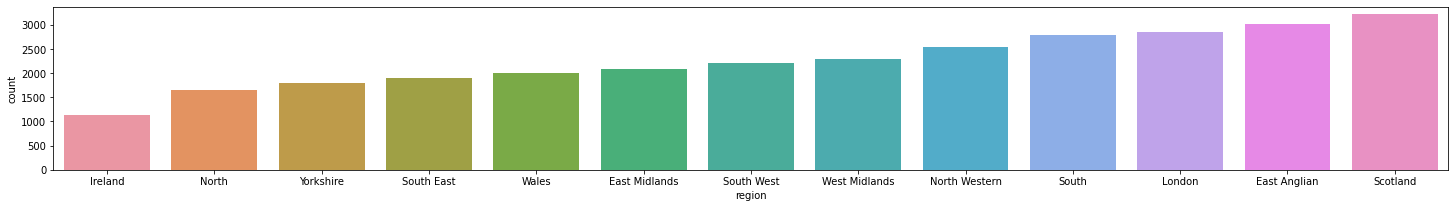

In [37]:
plt.figure(figsize=(25, 3))
sns.countplot(data=stud_info, x=stud_info['region'], order = stud_info['region'].value_counts(ascending=True).index)

Here we can see the distribution of students by region

**IMD Band**

<AxesSubplot:xlabel='imd', ylabel='count'>

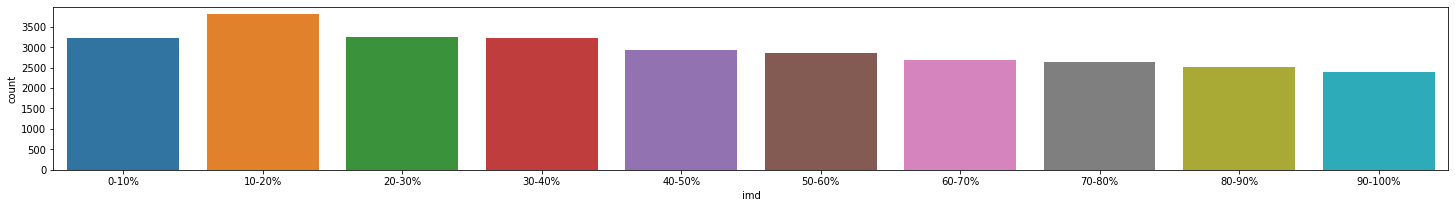

In [38]:
# list of imd possibilites
imds = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
plt.figure(figsize=(25, 3))
sns.countplot(data=stud_info, x=stud_info['imd'], order=imds)

In this bar graph we see the distribution of students by IMD band. Many students seem to be in more deprived countries with a spike in students in the 10-20% band.

**Age**

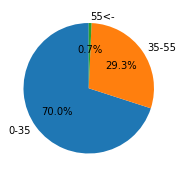

In [39]:
# list of age_band possibilities
ages = ['0-35', '35-55', '55<-']
age_freqs = stud_info['age'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.pie(data=stud_info, x=age_freqs, labels=ages, autopct='%1.1f%%', startangle=90)
plt.show()

over 70% of our students are under 35.
For ages we see that there is less than 1% of people in the 55 and over range and so we will combine that with the 35-55 range to make two ranges:
0-35 and 35+

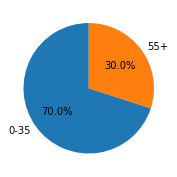

In [40]:
stud_info = stud_info.replace({'age':{'55<=':'35+', '35-55':'35+'}})
ages_updated = ['0-35', '55+']
age_freqs = stud_info['age'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.pie(data=stud_info, x=age_freqs, labels=ages_updated, autopct='%1.1f%%', startangle=90)
plt.show()

**Gender**

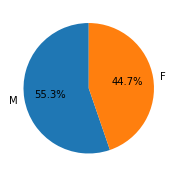

In [42]:
genders = ['M', 'F']
gender_freqs = stud_info['gender'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.pie(data=stud_info, x=gender_freqs, labels=genders, autopct='%1.1f%%', startangle=90)
plt.show()

Our male to female student distribution is fairly even.

**Education**

<AxesSubplot:xlabel='education', ylabel='count'>

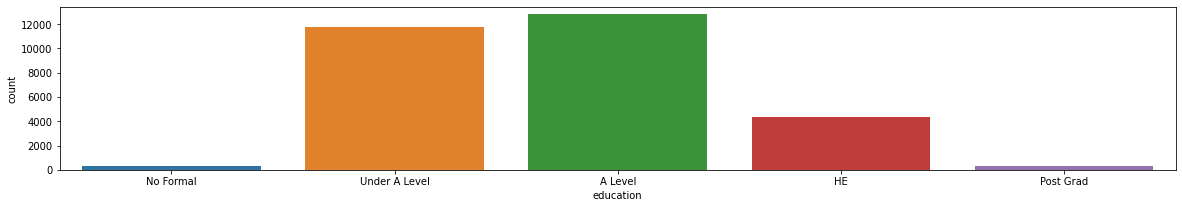

In [43]:
# list of education possibilities
educations = ['No Formal', 'Under A Level', 'A Level', 'HE', 'Post Grad']
plt.figure(figsize=(20, 3))
sns.countplot(data=stud_info, x=stud_info['education'], order=educations)

Very few of our students fall into `No Formal` and `Post Grad` and these variables will likely not make the most accurate predictions. Due to this `No Formal` will be combined with `Under A Level` and `Post Grad` will be combined with `HE` students

In [44]:
stud_info = stud_info.replace({'education':{'No Formal':'Under A Level', 'Post Grad':'HE'}})

<AxesSubplot:xlabel='education', ylabel='count'>

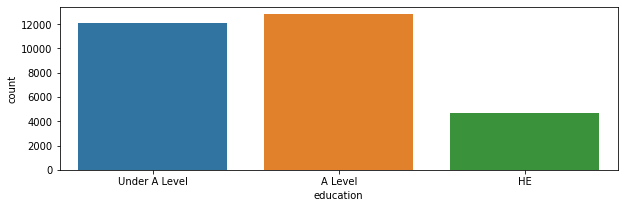

In [45]:
# list of education possibilities
educations_updated = ['Under A Level', 'A Level', 'HE']
plt.figure(figsize=(10, 3))
sns.countplot(data=stud_info, x=stud_info['education'], order=educations_updated)

**Disability**

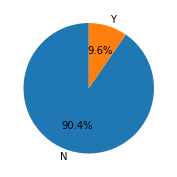

In [49]:
disabilities=['N', 'Y']
disability_freqs = stud_info['disability'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.pie(data=stud_info, x=disability_freqs, labels=disabilities, autopct='%1.1f%%', startangle=90)
plt.show()

Under 10% of our students identified as having disabilities and so are underrepresented in this group.

**Student Results Overall**

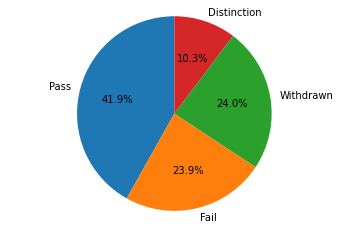

In [70]:
# list of result possibilities
results = ['Pass', 'Fail', 'Withdrawn', 'Distinction']
result_freqs = stud_info['result'].value_counts(normalize=True)
pass_perc = round((result_freqs[0] * 100), 1)
withdraw_perc = round((result_freqs[1] * 100), 1)
fail_perc = round((result_freqs[2] * 100), 1)
distinct_perc = round((result_freqs[3] * 100), 1)
results_percs = [pass_perc, fail_perc, withdraw_perc, distinct_perc]

fig1, ax1 = plt.subplots()
ax1.pie(results_percs, labels=results, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [51]:
neg_result = fail_perc + withdraw_perc
pos_result = pass_perc + distinct_perc
md(f'''
* Here we can see that we have a negative result of withdrawing or failing **{neg_result}%** of the time,
with **{pos_result}%** of students achieving a positive result of passing or passing with distinction.
''')


* Here we can see that we have a negative result of withdrawing or failing **47.9%** of the time,
with **52.2%** of students achieving a positive result of passing or passing with distinction.


* We will be using classification to identify students as having negative or positive results and so will identify `Distinction` and `Pass` as positive results which we will label as boolean True and `Fail` and `Withdrawn` as negative results which we will label as boolean False. This will be done in another column.

In [66]:
classify_results(stud_info)

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_unregistration,result_class
0,AAA,2013J,11391,East Anglian,90-100%,35+,M,HE,False,0,240,Pass,<NA>,True
1,AAA,2013J,28400,Scotland,20-30%,35+,F,HE,False,0,60,Pass,<NA>,True
2,AAA,2013J,30268,North Western,30-40%,35+,F,A Level,True,0,60,Withdrawn,12,False
3,AAA,2013J,31604,South East,50-60%,35+,F,A Level,False,0,60,Pass,<NA>,True
4,AAA,2013J,32885,West Midlands,50-60%,0-35,F,Under A Level,False,0,60,Pass,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Wales,10-20%,0-35,F,Under A Level,False,0,30,Fail,<NA>,False
32589,GGG,2014J,2645731,East Anglian,40-50%,35+,F,Under A Level,False,0,30,Distinction,<NA>,True
32590,GGG,2014J,2648187,South,20-30%,0-35,F,A Level,True,0,30,Pass,<NA>,True
32591,GGG,2014J,2679821,South East,90-100%,35+,F,Under A Level,False,0,30,Withdrawn,101,False


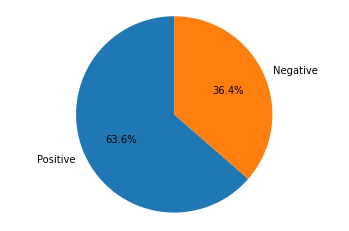

In [71]:
# list of result possibilities
results_classes = ['Positive', 'Negative']
result_class_freqs = stud_info['result'].value_counts(normalize=True)
pos_perc = round((result_freqs[0] * 100), 1)
neg_perc = round((result_freqs[1] * 100), 1)
results_percs = [pos_perc, neg_perc]

fig1, ax1 = plt.subplots()
ax1.pie(results_percs, labels=results_classes, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
